In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

from sklearn.preprocessing import StandardScaler
import pandas as pd

%matplotlib inline
def gelman_scale(dataframe):
    return (dataframe - dataframe.mean())/(2*dataframe.std())

def standard_scale(dataframe):
    return (dataframe - dataframe.mean())/(dataframe.std())

housing_df = pd.read_excel('Data/AmesHousing.xls', delimiter=r"\s+")
def apply_scale(dataframe, scaling_function):
    numerical_df = dataframe.select_dtypes(include=[float])
    print(numerical_df.columns)
    numerical_df = scaling_function(numerical_df)
    tmp_df = dataframe.copy()
    tmp_df[numerical_df.columns] = numerical_df
    return tmp_df



housing_df.set_index("PID", inplace=True)

housing_df = pd.read_excel('Data/AmesHousing.xls', delimiter=r"\s+")
housing_df['MS SubClass'] = housing_df['MS SubClass'].astype('category')
housing_df['Overall Qual'] = housing_df['Overall Qual'].astype('category')
housing_df['Overall Cond']= housing_df['Overall Cond'].astype('category')
housing_df['Bsmt Full Bath'] = housing_df['Bsmt Full Bath'].astype('category')
housing_df['Bsmt Half Bath'] = housing_df['Bsmt Half Bath'].astype('category')
housing_df['Full Bath'] = housing_df['Full Bath'].astype('category')
housing_df['Half Bath'] = housing_df['Half Bath'].astype('category')
housing_df['Bedroom AbvGr'] = housing_df['Bedroom AbvGr'].astype('category')
housing_df['Kitchen AbvGr'] = housing_df['Kitchen AbvGr'].astype('category')
housing_df['TotRms AbvGrd'] = housing_df['TotRms AbvGrd'].astype('category')
housing_df['Fireplaces'] = housing_df['Fireplaces'].astype('category')
housing_df['Garage Cars'] = housing_df['Garage Cars'].astype('category')
housing_df['Mo Sold'] = housing_df['Mo Sold'].astype('category')

for column in housing_df.select_dtypes(['object']).columns:
    housing_df[column] = housing_df[column].astype('category')



housing_df['Lot Frontage'].fillna(housing_df['Lot Frontage'].mean(), inplace=True)
housing_df['Mas Vnr Area'].fillna(housing_df['Mas Vnr Area'].mean(), inplace=True)
housing_df['Garage Yr Blt'].fillna(housing_df['Garage Yr Blt'].mean(), inplace=True)


empty_means_without = ["Alley","Bsmt Qual","Bsmt Cond","Bsmt Exposure","BsmtFin SF 1",
                        "BsmtFin SF 2", "Fireplace Qu","Garage Type","Garage Finish",
                        "Garage Qual","Garage Cond","Pool QC","Fence","Misc Feature"]

def replace_empty(feature, value):
    housing_df[feature].cat.add_categories([value], inplace=True)
    housing_df[feature].fillna(value, inplace=True)


replace_empty("Alley", "None")
replace_empty("Bsmt Qual", "None")
replace_empty("Bsmt Cond", "None")
replace_empty("Bsmt Exposure", "None")
replace_empty("BsmtFin Type 1", "None")
replace_empty("BsmtFin Type 2", "None")
replace_empty("Fireplace Qu", "None")
replace_empty("Garage Type", "None")
replace_empty("Garage Finish", "None")
replace_empty("Garage Qual", "None")
replace_empty("Garage Cond", "None")
replace_empty("Pool QC", "None")
replace_empty("Fence", "None")
replace_empty("Misc Feature", "None")

housing_df.dropna(inplace=True)


df_housing_original = pd.get_dummies(housing_df)
df_housing_original.drop('Order',axis = 1,inplace = True)
df_housing_original.drop('PID',axis = 1, inplace = True)

df_gelman = apply_scale(df_housing_original, gelman_scale)
housing_train_df = df_gelman.drop('SalePrice', axis=1)
housing_target = df_gelman['SalePrice']

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Yr Blt', 'Garage Area'],
      dtype='object')


In [91]:
for col in df_gelman.columns:
 print(col)

Lot Frontage
Lot Area
Year Built
Year Remod/Add
Mas Vnr Area
BsmtFin SF 1
BsmtFin SF 2
Bsmt Unf SF
Total Bsmt SF
1st Flr SF
2nd Flr SF
Low Qual Fin SF
Gr Liv Area
Garage Yr Blt
Garage Area
Wood Deck SF
Open Porch SF
Enclosed Porch
3Ssn Porch
Screen Porch
Pool Area
Misc Val
Yr Sold
SalePrice
MS SubClass_20
MS SubClass_30
MS SubClass_40
MS SubClass_45
MS SubClass_50
MS SubClass_60
MS SubClass_70
MS SubClass_75
MS SubClass_80
MS SubClass_85
MS SubClass_90
MS SubClass_120
MS SubClass_150
MS SubClass_160
MS SubClass_180
MS SubClass_190
MS Zoning_A (agr)
MS Zoning_C (all)
MS Zoning_FV
MS Zoning_I (all)
MS Zoning_RH
MS Zoning_RL
MS Zoning_RM
Street_Grvl
Street_Pave
Alley_Grvl
Alley_Pave
Alley_None
Lot Shape_IR1
Lot Shape_IR2
Lot Shape_IR3
Lot Shape_Reg
Land Contour_Bnk
Land Contour_HLS
Land Contour_Low
Land Contour_Lvl
Utilities_AllPub
Utilities_NoSeWa
Utilities_NoSewr
Lot Config_Corner
Lot Config_CulDSac
Lot Config_FR2
Lot Config_FR3
Lot Config_Inside
Land Slope_Gtl
Land Slope_Mod
Land Slope

In [88]:
final_df = df_gelman[['Gr Liv Area','Lot Area','Total Bsmt SF','BsmtFin SF 1','Garage Area',
                      'Year Built','Garage Cars_2.0',
                      'Neighborhood_Somerst','Year Remod/Add','Bsmt Unf SF']]
sample_df = final_df.sample(5)
sample_df

,Gr Liv Area,Lot Area,Total Bsmt SF,BsmtFin SF 1,Garage Area,Year Built,Garage Cars_2.0,Neighborhood_Somerst,Year Remod/Add,Bsmt Unf SF
840,1097,10859,0.052117,-0.486242,0.463787,1994,1,0,1995,0.613365
659,1078,10230,0.003276,-0.486242,-0.483827,1925,0,0,1950,0.564404
818,1680,10933,0.572331,0.635090,1.546110,2009,0,0,2009,-0.027687
666,2544,9671,0.223628,-0.486242,1.009594,1969,0,0,1969,0.785299
1041,987,1890,-0.645289,0.044222,-0.279440,1972,0,0,1972,-0.635718


In [89]:
original_final_df = df_housing_original[['Gr Liv Area','Lot Area','Total Bsmt SF','BsmtFin SF 1','Garage Area','Year Built',
                                         'Garage Cars_2.0','Neighborhood_Somerst','Year Remod/Add','Bsmt Unf SF']]
original_final_df.mean()

Gr Liv Area              1497.739924
Lot Area                10130.568378
Total Bsmt SF            1051.116087
BsmtFin SF 1              442.734757
Garage Area               472.314158
Year Built               1971.126076
Garage Cars_2.0             0.545298
Neighborhood_Somerst        0.059249
Year Remod/Add           1984.107131
Bsmt Unf SF               558.315880
dtype: float64

In [84]:
df_housing_original.iloc[[2299, 2561, 720, 2246, 1984]]

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
2322,68.0,13108,1994,1994,0.0,0.0,0.0,2062.0,2062.0,2079,...,0,0,0,1,0,0,0,0,1,0
2587,65.0,11050,1956,1956,0.0,488.0,0.0,517.0,1005.0,1005,...,0,0,0,1,0,0,0,0,1,0
724,60.0,5400,1920,1950,0.0,0.0,0.0,972.0,972.0,1044,...,0,0,0,0,0,0,0,1,0,0
2269,80.0,11305,2002,2002,886.0,1329.0,0.0,593.0,1922.0,1922,...,0,0,0,1,0,0,0,0,1,0
2004,76.0,11800,1949,2002,0.0,0.0,0.0,0.0,0.0,1382,...,0,0,0,1,0,0,0,0,1,0


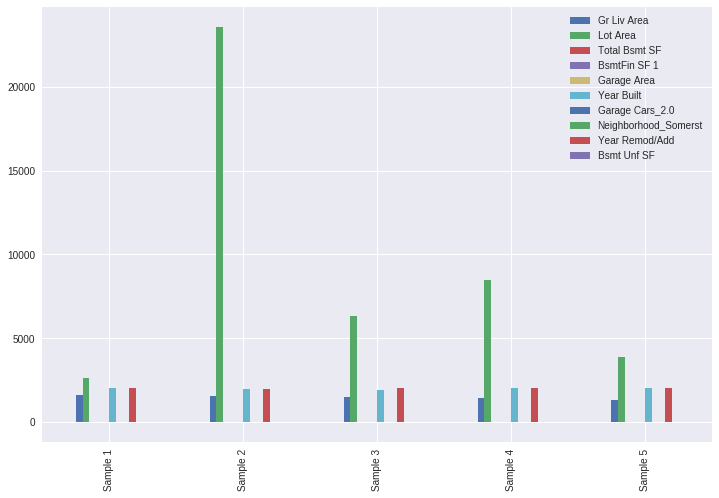

In [85]:
sample_df.plot(kind='bar', figsize=(12,8))
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])